### Lectura de Datos

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv",parse_dates=['indice_tiempo'])

In [3]:
dataset

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m,futuro_rofex_usd_12m,interes_abierto_12m
0,2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2002-03-10,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2002-03-11,NaN,2.2525,NaN,NaN,2.253968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2002-03-12,NaN,2.3650,NaN,NaN,2.367816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2002-03-13,NaN,2.3317,NaN,NaN,2.348571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2002-03-14,NaN,2.3650,NaN,NaN,2.343195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.columns

Index(['indice_tiempo', 'tipo_cambio_bna_vendedor', 'tipo_cambio_a3500',
       'tipo_cambio_mae', 'volumen_mae', 'tipo_cambio_implicito_en_adrs',
       'futuro_rofex_usd1m', 'interes_abierto_1m', 'futuro_rofex_usd2m',
       'interes_abierto_2m', 'futuro_rofex_usd3m', 'interes_abierto_3m',
       'futuro_rofex_usd4m', 'interes_abierto_4m', 'futuro_rofex_usd5m',
       'interes_abierto_5m', 'futuro_rofex_usd6m', 'interes_abierto_6m',
       'futuro_rofex_usd_12m', 'interes_abierto_12m'],
      dtype='object')

### Para el análisis elijo usar la variable *"tipo_cambio_bna_vendedor"*

In [5]:
myDataSet = dataset.loc[:,['indice_tiempo', 'tipo_cambio_bna_vendedor']]
myDataSet.set_index('indice_tiempo',inplace=True)
myDataSet.head()

,tipo_cambio_bna_vendedor
indice_tiempo,
2002-03-05,NaN
2002-03-06,NaN
2002-03-07,NaN
2002-03-08,NaN
2002-03-09,NaN


In [6]:
myDataSet.dtypes

tipo_cambio_bna_vendedor    float64
dtype: object

### Analisis de la variable *"tipo_cambio_bna_vendedor"*

In [7]:
import matplotlib.pyplot as plt

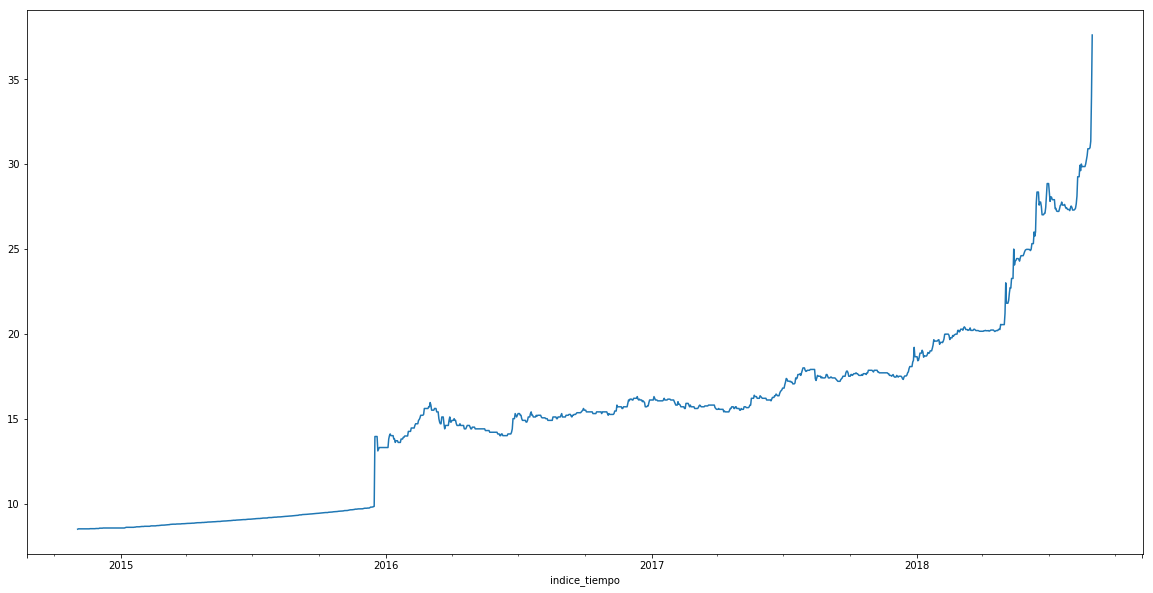

In [8]:
myDataSet.plot(figsize=[20,10],legend=False,)

### A partir del gráfico anterior se proponen los casos testigo: 
    C1: Año 2015
    C2: Años 2016, 2017
    C3: Año 2018

In [9]:
myDataSet['month'] = myDataSet.index.month
myDataSet['year'] = myDataSet.index.year

groupData = myDataSet[myDataSet.index > '2014-01-01'].groupby(['year','month',]).mean()
groupData.head()

tipo_cambio_bna_vendedor
year month                          
2014 1                           NaN
     2                           NaN
     3                           NaN
     4                           NaN
     5                           NaN

In [10]:
myDataSet.head()

,tipo_cambio_bna_vendedor,month,year
indice_tiempo,,,
2002-03-05,NaN,3,2002
2002-03-06,NaN,3,2002
2002-03-07,NaN,3,2002
2002-03-08,NaN,3,2002
2002-03-09,NaN,3,2002


### Filtrado de datos y eliminación de nulos, necesario para la aplicación de K-Means

In [11]:
X = myDataSet[myDataSet.index > '2014-01-01'].tipo_cambio_bna_vendedor.dropna()
#del X['indice_tiempo']
X.head()

indice_tiempo
2014-11-03    8.49
2014-11-04    8.51
2014-11-05    8.51
2014-11-06    8.51
2014-11-07    8.51
Name: tipo_cambio_bna_vendedor, dtype: float64

In [12]:
# X = X.values

### Aplicación de Elbow Method para analizar cantidad óptima de clusters

In [13]:
X = pd.DataFrame(X)

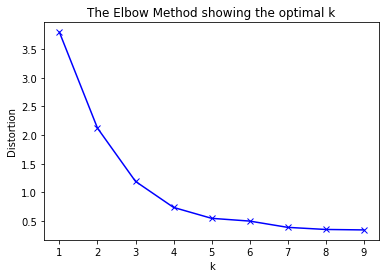

In [14]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

# k means determine k
distortions = []

# Análsis con 10 clusters
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Aplicacion de método Silhouette para determinar número optimo de clusters

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np

range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6566434845825284
For n_clusters = 3 The average silhouette_score is : 0.7678750180352375
For n_clusters = 4 The average silhouette_score is : 0.7480571379234269
For n_clusters = 5 The average silhouette_score is : 0.7447033749070574
For n_clusters = 6 The average silhouette_score is : 0.7455304479577335
For n_clusters = 7 The average silhouette_score is : 0.7344751363625113
For n_clusters = 8 The average silhouette_score is : 0.7386820357445488
For n_clusters = 9 The average silhouette_score is : 0.739735955679754


### Elbow method y silhuette indican que el mejor numeero de clusters es 3

### Entreno K-Means con 3 clusters

In [16]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Visualización de elementos en cada cluster:

In [17]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = kmeanModel.labels_

### Cluster 1

In [18]:
cluster_map[cluster_map.cluster == 0].head(20)

,data_index,cluster
409,2015-12-17,0
410,2015-12-18,0
411,2015-12-19,0
412,2015-12-20,0
413,2015-12-21,0
414,2015-12-22,0
415,2015-12-23,0
416,2015-12-24,0
417,2015-12-25,0
418,2015-12-26,0


In [19]:
cluster_map[cluster_map.cluster == 1].head(20)

,data_index,cluster
0,2014-11-03,1
1,2014-11-04,1
2,2014-11-05,1
3,2014-11-06,1
4,2014-11-07,1
5,2014-11-08,1
6,2014-11-09,1
7,2014-11-10,1
8,2014-11-11,1
9,2014-11-12,1


In [20]:
cluster_map[cluster_map.cluster == 2].head(20)

,data_index,cluster
1277,2018-05-03,2
1278,2018-05-04,2
1279,2018-05-05,2
1280,2018-05-06,2
1281,2018-05-07,2
1282,2018-05-08,2
1283,2018-05-09,2
1284,2018-05-10,2
1285,2018-05-11,2
1286,2018-05-12,2


Ordenando temporalmente los clusters vemos los períodos:
2014-11-03 -> 2015-12-16
2015-12-17 -> 2018-05-02
2018-05-03 -> 2018-08-30

### Revisando nuevamente el gráfico anterior:

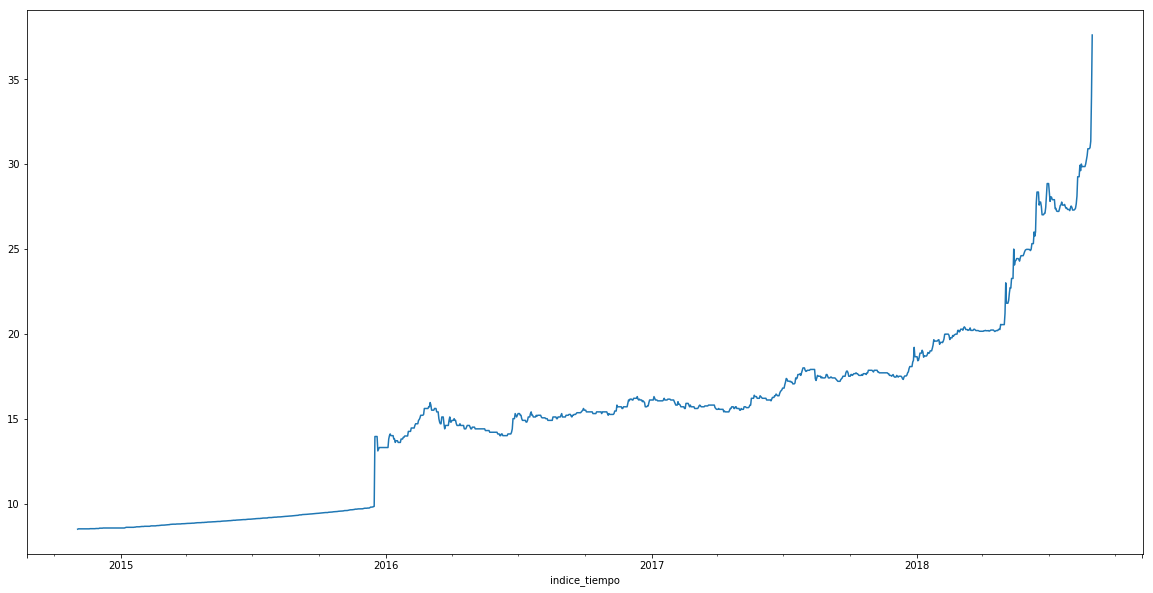

In [21]:
myDataSet.tipo_cambio_bna_vendedor.plot(figsize=[20,10],legend=False,)

Comparando los casos testigo iniciales con la clasificación propuesta por los clusters vemos que coinciden, lo que indique que para este tipo de problemas la solución de clustering aplica perfectamente.